# WRT - AT - Technical Assessment - EDA
Notebook for modelling the cleaned (deduplicated, missing value imputed, column dropped) data to predict the price variable.

# Setup

In [251]:
# load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from tqdm import tqdm
from sklearn.ensemble import GradientBoostingRegressor

In [217]:
# setup notebook
pd.set_option("display.max_columns", None)

# Load

In [219]:
# load data
directory_path = "/Users/nb1777/Git/wrt_at"
file_path = (
    "vehicle_price_prediction/vehicle_price_prediction/data/at_vehicle_data_clean.csv"
)
df_in = pd.read_csv("/".join([directory_path, file_path]))

# Examine

In [221]:
df_in.head(10)

,make,model,body_type,fuel_type,engine_size,transmission,year,mileage,price,colour,area,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,price_position
0,BMW,X1,SUV,Petrol,2.0,Automatic,2021.0,13434,32000,Blue,BS,1,1,1,0,1,1,0,1,1,1,100.4
1,BMW,2 Series Gran Coupe,Saloon,Petrol,1.5,Automatic,2021.0,6347,32898,Blue,G,1,0,1,0,0,0,1,0,0,0,111.3
2,BMW,2 Series Gran Coupe,Saloon,Petrol,1.5,Manual,2021.0,10,35510,Blue,PE,1,1,1,0,1,0,1,1,0,0,NaN
3,BMW,4 Series,Coupe,Diesel Hybrid,2.0,Automatic,2022.0,6500,37999,Grey,B,1,1,1,0,1,1,1,0,0,0,102.5
4,BMW,1 Series,Hatchback,Diesel,2.0,Manual,2012.0,136952,4890,Black,S,0,0,0,0,0,0,0,0,0,0,99.1
5,BMW,2 Series Gran Tourer,MPV,Diesel,2.0,Automatic,2017.0,48690,19200,Silver,PE,0,0,0,0,0,1,0,1,0,0,104.1
6,BMW,2 Series,Coupe,Petrol,1.5,Manual,2018.0,14000,19990,Grey,BN,1,1,1,0,0,1,1,0,1,0,111.6
7,BMW,X4,SUV,Diesel Hybrid,2.0,Automatic,2021.0,14708,44990,Blue,PH,0,0,0,1,1,0,1,0,0,0,102.5
8,BMW,2 Series Active Tourer,MPV,Petrol,1.5,Manual,2018.0,29745,16000,Black,WN,0,0,1,0,0,0,0,0,0,0,107.3
9,BMW,7 Series,Saloon,Diesel,3.0,Automatic,2019.0,22370,37750,Multicolour,EH,0,0,0,0,0,1,0,0,0,0,91.4


In [222]:
# missing values
df_in.isna().sum()

make                0
model               0
body_type           0
fuel_type           0
engine_size         0
transmission        0
year                0
mileage             0
price               0
colour              0
area                0
feature_1           0
feature_2           0
feature_3           0
feature_4           0
feature_5           0
feature_6           0
feature_7           0
feature_8           0
feature_9           0
feature_10          0
price_position    984
dtype: int64

In [223]:
# drop `price_position` - not needed for modelling
df = df_in.drop(["price_position"], axis=1)
print(df.shape)

(9522, 21)


# Other

- outlier detection?
- data sparsity?
- dimensionality scaling?

# Investigate

- Linear Regression:
    - simple to implement and provides interpretable results. Linear regression works well if there’s a linear relationship between the features and the target
    - assumes a linear relationship between features and price, so it might struggle with more complex patterns in the data

- Random Forest Regressor:
    - powerful, non-linear model that can handle both numerical and categorical data (though the categorical data still needs encoding). It’s good for datasets with mixed data types and can capture non-linear relationships well.

- Gradient Boosting Machines (XGBoost)
    - top-performing models for many structured data problems
    - handle non-linear relationships, capture interactions between features, and often outperform traditional models like linear regression
    - highly flexible, powerful, and tend to outperform simpler models, especially when there's a complex relationship between features and the target variable

- Neural Networks
    - advanced approach that can capture complex patterns in the data. They can handle both numerical and categorical data (with proper preprocessing) and capture deep interactions between features
    - data-hungry and computationally expensive compared to tree-based methods like RandomForest or Gradient Boosting

### Linear Regression (LR)

#### Model1 - LR (year)

From the EDA analysis, it was shown that year had the greatest magnitude of correlation with the price, so we'll create a baseline linear regression model that uses a this single variable to predict the price.

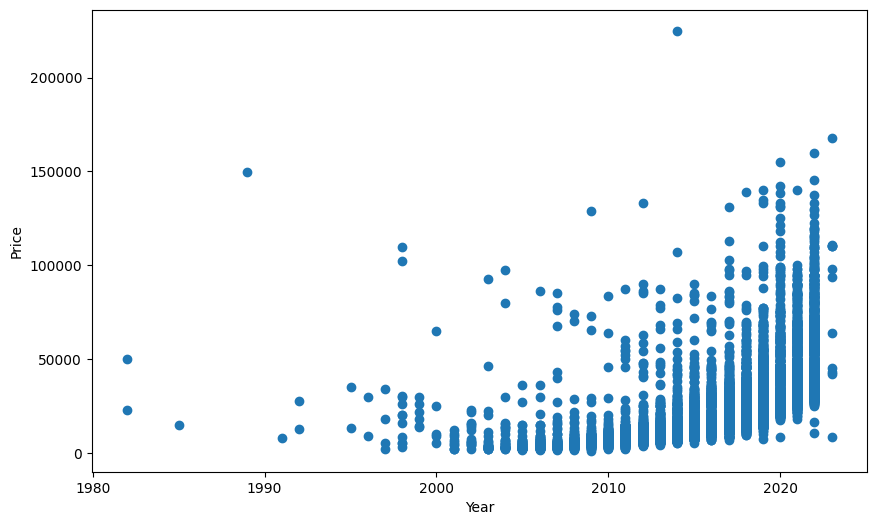

In [224]:
# plot year - price
plt.figure(figsize=(10, 6))
plt.scatter(x=df["year"], y=df["price"])
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [225]:
# create a random test-train split
X = df[["year"]]
numeric_features = ["year"]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[numeric_features])
X_test = scaler.fit_transform(X_test[numeric_features])

In [226]:
# linear regression model
model = LinearRegression()

# fit model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Optional: Show coefficients
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 229771274.38927147
R^2 Score: 0.3557791133452275
Coefficient: 10897.05824755354
Intercept: 26664.95142444559


- year positively impacts price (the newer a vehicle is the more expensive the vehicle is)

Model Iterations:: 100%|██████████| 100/100 [00:00<00:00, 276.55it/s]


Mean Squared Error: 251327538
Mean R^2: 0.323


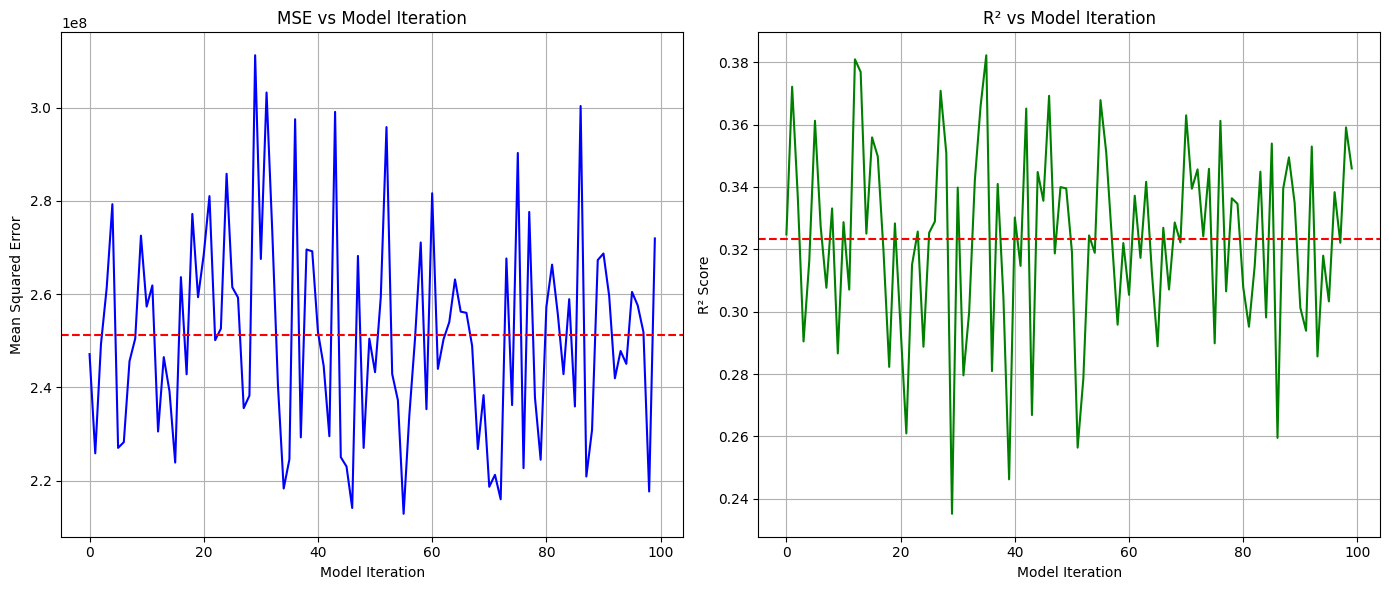

In [227]:
# apply LR model (over loop to generate 100 different models)

X = df[["year"]]
y = df["price"]

model_results = []

for i in tqdm(range(100), desc="Model Iterations:"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train[numeric_features])
    X_test = scaler.fit_transform(X_test[numeric_features])

    # linear regression model
    model = LinearRegression()

    # fit model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {"itr": i, "mse": mse, "r2": r2}

    model_results.append(results)

df_model_results = pd.DataFrame(model_results)

# plot results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# averages
mean_mse = df_model_results["mse"].mean()
mean_r2 = df_model_results["r2"].mean()
print(f"Mean Squared Error: {mean_mse:.0f}")
print(f"Mean R^2: {mean_r2:.3}")

# MSE
axs[0].plot(df_model_results["itr"], df_model_results["mse"], color="blue")
axs[0].axhline(y=mean_mse, color="red", linestyle="--", label="Average MSE")

axs[0].set_title("MSE vs Model Iteration")
axs[0].set_xlabel("Model Iteration")
axs[0].set_ylabel("Mean Squared Error")
axs[0].grid()

# R^2
axs[1].plot(df_model_results["itr"], df_model_results["r2"], color="green")
axs[1].axhline(y=mean_r2, color="red", linestyle="--", label="Average R²")
axs[1].set_title("R² vs Model Iteration")
axs[1].set_xlabel("Model Iteration")
axs[1].set_ylabel("R² Score")
axs[1].grid()

plt.tight_layout()
plt.show()

- significantly large MSE
- low R-squared score, does a bad job of explaining variance

#### Model2 - LR (year, mileage)


From the EDA analysis, year and mileage were the two variables with the largest magnitudes of correlation with the target variable (price), so we'll create a Linear Regression model using these two variables to predict price.

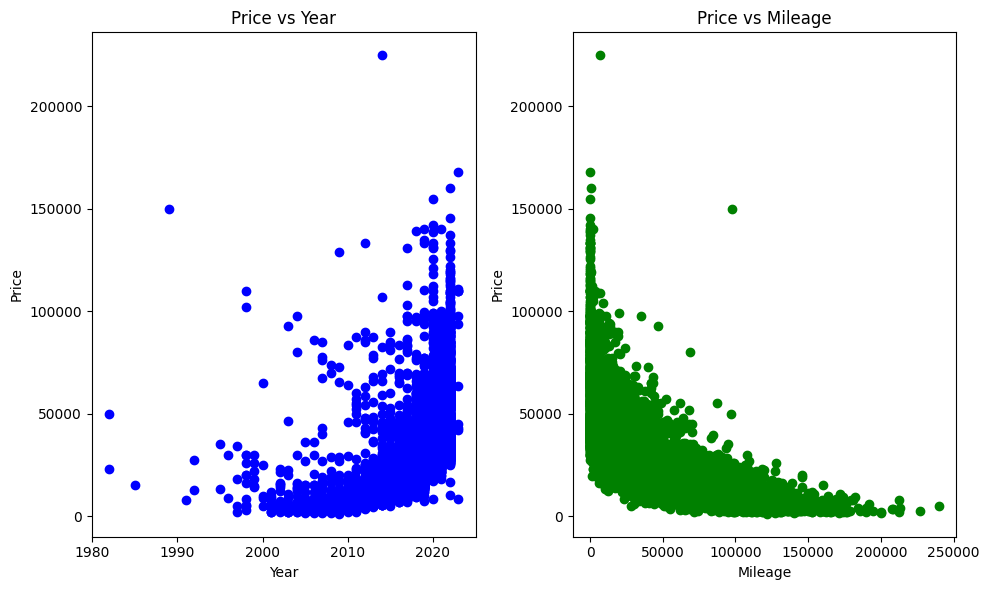

In [228]:
# plot year - price and mileage - price
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# year - price
axs[0].scatter(df["year"], df["price"], color="blue")
axs[0].set_title("Price vs Year")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Price")

# mileage-price
axs[1].scatter(df["mileage"], df["price"], color="green")
axs[1].set_title("Price vs Mileage")
axs[1].set_xlabel("Mileage")
axs[1].set_ylabel("Price")

plt.tight_layout()
plt.show()

In [229]:
# create a random test-train split
X = df[["year", "mileage"]]
numeric_features = ["year", "mileage"]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[numeric_features])
X_test = scaler.fit_transform(X_test[numeric_features])

In [230]:
# linear regression model
model = LinearRegression()

# fit model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Optional: Show coefficients
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 190657306.19790486
R^2 Score: 0.46544484652186047
Coefficient: [ 4058.63326068 -9878.65629452]
Intercept: 26664.951424445422


- mileage negatively impacts price (the more miles a vehicle has done, the cheaper the vehicle)

Model Iterations:: 100%|██████████| 100/100 [00:00<00:00, 249.10it/s]


Mean Squared Error: 207331285
Mean R^2: 0.452


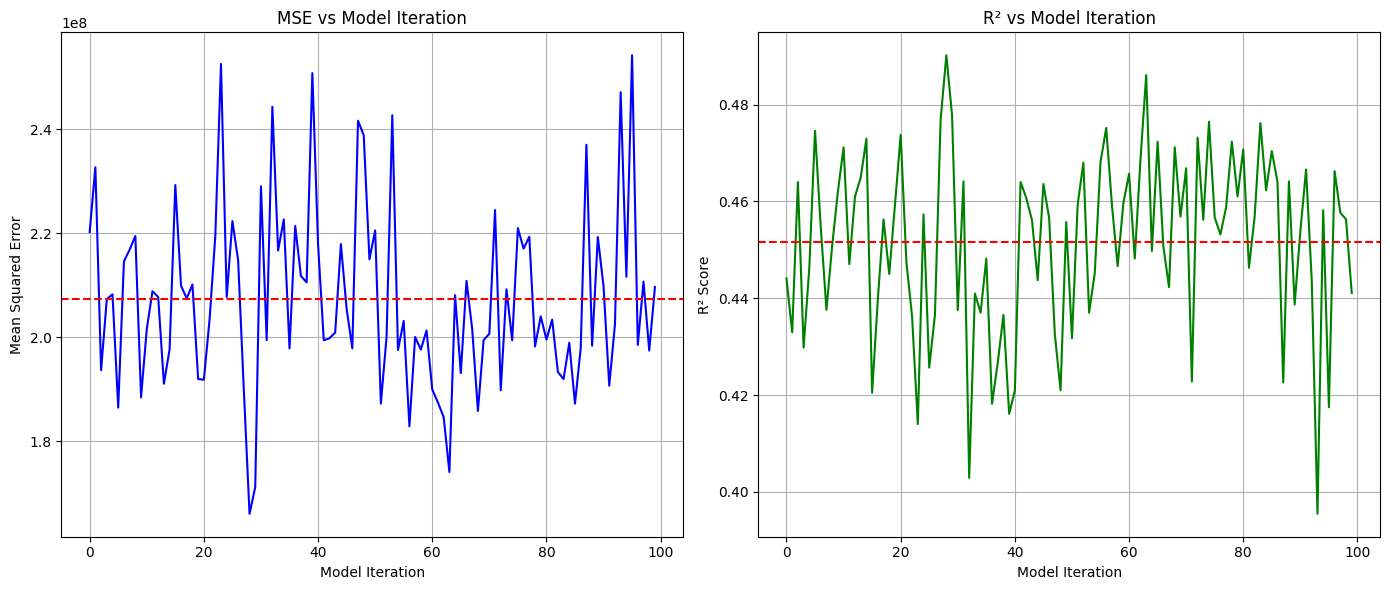

In [231]:
# apply LR model (over loop to generate 100 different models)

X = df[["year", "mileage"]]
numeric_features = ["year", "mileage"]
y = df["price"]

model_results = []

for i in tqdm(range(100), desc="Model Iterations:"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train[numeric_features])
    X_test = scaler.fit_transform(X_test[numeric_features])

    # linear regression model
    model = LinearRegression()

    # fit model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {"itr": i, "mse": mse, "r2": r2}

    model_results.append(results)

df_model_results = pd.DataFrame(model_results)

# plot results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# averages
mean_mse = df_model_results["mse"].mean()
mean_r2 = df_model_results["r2"].mean()
print(f"Mean Squared Error: {mean_mse:.0f}")
print(f"Mean R^2: {mean_r2:.3}")

# MSE
axs[0].plot(df_model_results["itr"], df_model_results["mse"], color="blue")
axs[0].axhline(y=mean_mse, color="red", linestyle="--", label="Average MSE")

axs[0].set_title("MSE vs Model Iteration")
axs[0].set_xlabel("Model Iteration")
axs[0].set_ylabel("Mean Squared Error")
axs[0].grid()

# R^2
axs[1].plot(df_model_results["itr"], df_model_results["r2"], color="green")
axs[1].axhline(y=mean_r2, color="red", linestyle="--", label="Average R²")
axs[1].set_title("R² vs Model Iteration")
axs[1].set_xlabel("Model Iteration")
axs[1].set_ylabel("R² Score")
axs[1].grid()

plt.tight_layout()
plt.show()

- lower MSE, but still very high
- low R-squared score, captures more data variance than Model0, but still a low value

#### Model3 - LR (all numerical with correlation greater than 0.2)



From the EDA analysis, we can extract all numerical variables with a magnitude of correlation with the target variable (price) greater than 0.2 (arbitary value to select a range of features, but not all)

- engine_size   : 0.23
- year          : 0.64
- mileage       : -0.65
- feature_4     : 0.28
- feature_5     : 0.37
- feature_6     : -0.32

Model Iterations:: 100%|██████████| 100/100 [00:00<00:00, 171.99it/s]


Mean Squared Error: 169175239
Mean R^2: 0.548


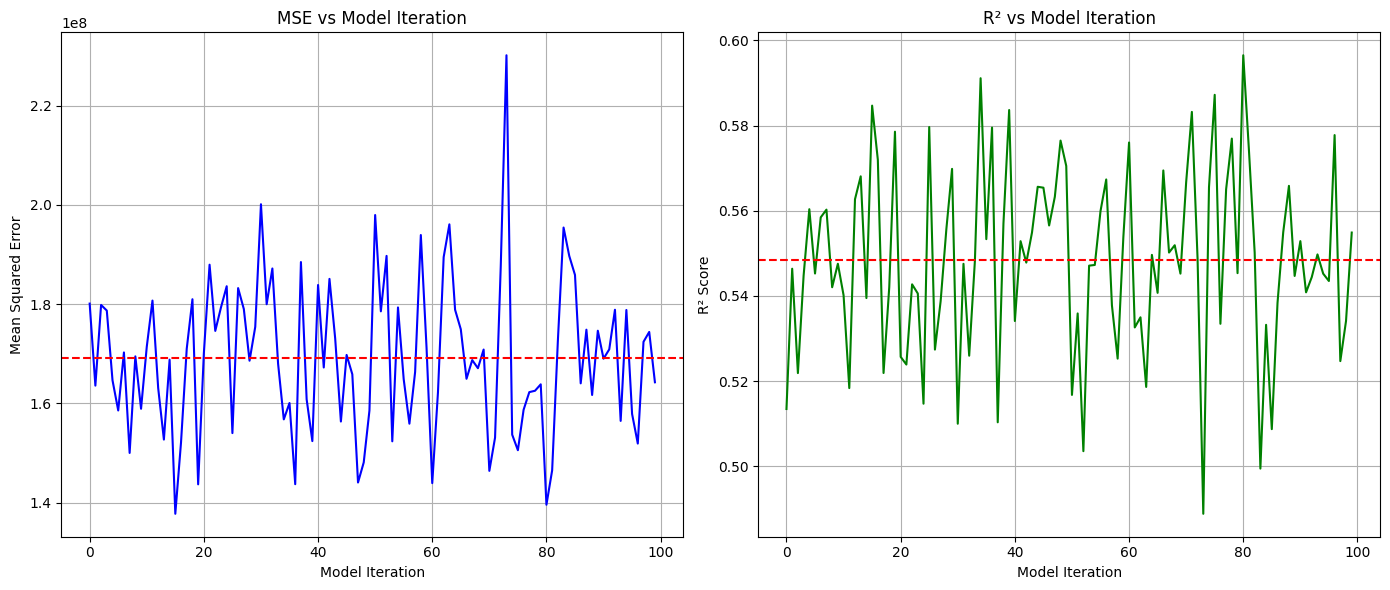

In [232]:
# apply LR model (over loop to generate 100 different models)

X = df[["engine_size", "year", "mileage", "feature_4", "feature_5", "feature_6"]]
numeric_features = ["engine_size", "year", "mileage"]
y = df["price"]

model_results = []

for i in tqdm(range(100), desc="Model Iterations:"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train[numeric_features])
    X_test = scaler.fit_transform(X_test[numeric_features])

    # linear regression model
    model = LinearRegression()

    # fit model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {"itr": i, "mse": mse, "r2": r2}

    model_results.append(results)

df_model_results = pd.DataFrame(model_results)

# plot results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# averages
mean_mse = df_model_results["mse"].mean()
mean_r2 = df_model_results["r2"].mean()
print(f"Mean Squared Error: {mean_mse:.0f}")
print(f"Mean R^2: {mean_r2:.3}")

# MSE
axs[0].plot(df_model_results["itr"], df_model_results["mse"], color="blue")
axs[0].axhline(y=mean_mse, color="red", linestyle="--", label="Average MSE")

axs[0].set_title("MSE vs Model Iteration")
axs[0].set_xlabel("Model Iteration")
axs[0].set_ylabel("Mean Squared Error")
axs[0].grid()

# R^2
axs[1].plot(df_model_results["itr"], df_model_results["r2"], color="green")
axs[1].axhline(y=mean_r2, color="red", linestyle="--", label="Average R²")
axs[1].set_title("R² vs Model Iteration")
axs[1].set_xlabel("Model Iteration")
axs[1].set_ylabel("R² Score")
axs[1].grid()

plt.tight_layout()
plt.show()

#### Model4 - LR (all numerical variables)


Model Iterations:: 100%|██████████| 100/100 [00:00<00:00, 226.20it/s]


Mean Squared Error: 170588292
Mean R^2: 0.545


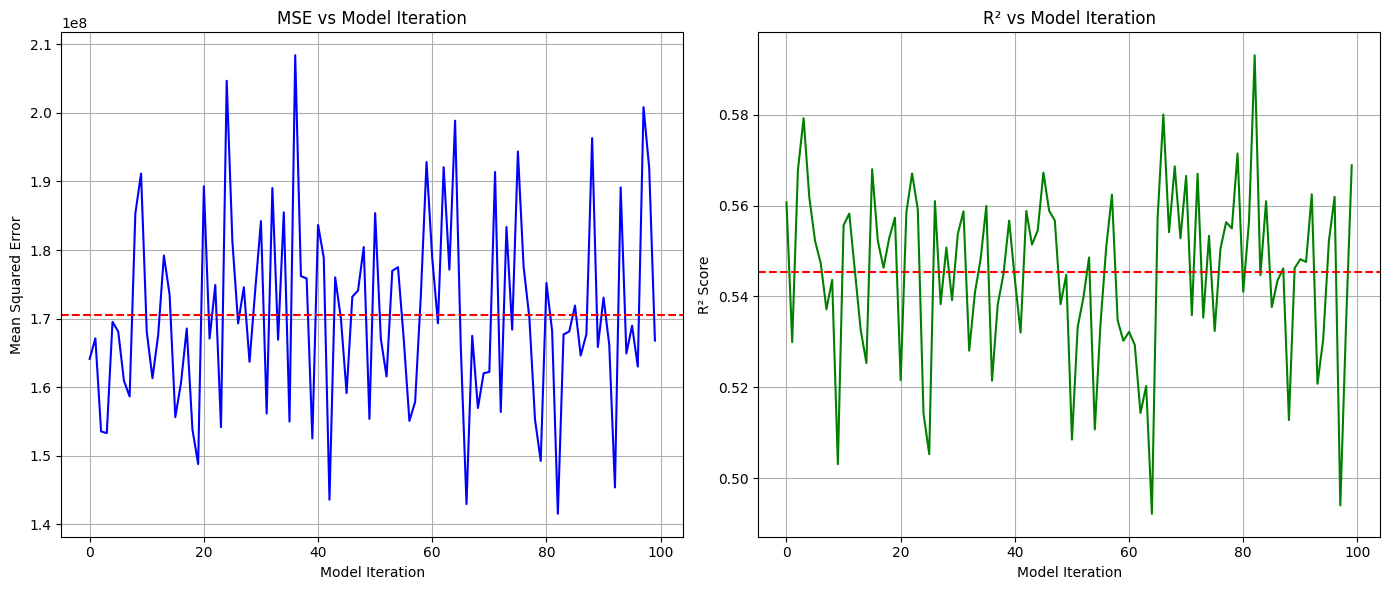

In [233]:
# apply LR model (over loop to generate 100 different models)

X = df[
    [
        "engine_size",
        "year",
        "mileage",
        "feature_1",
        "feature_2",
        "feature_3",
        "feature_4",
        "feature_5",
        "feature_6",
        "feature_7",
        "feature_8",
        "feature_9",
        "feature_10",
    ]
]
numeric_features = ["engine_size", "year", "mileage"]
y = df["price"]

model_results = []

for i in tqdm(range(100), desc="Model Iterations:"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train[numeric_features])
    X_test = scaler.fit_transform(X_test[numeric_features])

    # linear regression model
    model = LinearRegression()

    # fit model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {"itr": i, "mse": mse, "r2": r2}

    model_results.append(results)

df_model_results = pd.DataFrame(model_results)

# plot results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# averages
mean_mse = df_model_results["mse"].mean()
mean_r2 = df_model_results["r2"].mean()
print(f"Mean Squared Error: {mean_mse:.0f}")
print(f"Mean R^2: {mean_r2:.3}")

# MSE
axs[0].plot(df_model_results["itr"], df_model_results["mse"], color="blue")
axs[0].axhline(y=mean_mse, color="red", linestyle="--", label="Average MSE")

axs[0].set_title("MSE vs Model Iteration")
axs[0].set_xlabel("Model Iteration")
axs[0].set_ylabel("Mean Squared Error")
axs[0].grid()

# R^2
axs[1].plot(df_model_results["itr"], df_model_results["r2"], color="green")
axs[1].axhline(y=mean_r2, color="red", linestyle="--", label="Average R²")
axs[1].set_title("R² vs Model Iteration")
axs[1].set_xlabel("Model Iteration")
axs[1].set_ylabel("R² Score")
axs[1].grid()

plt.tight_layout()
plt.show()

#### Model5 - LR (all variables - categorical variables mixed encoded)

From the EDA, we know all vehciles are the same `make` so this can be dropped from the dataset. Meanwhile:
- `model` has 58 variants
- `body_type` has 8 variants
- `fuel_type` has 7 variants
- `transmission` has 3 variants
- `colour` has 15 variants
- `area` has 115 variants

Use mixed encoding technique:
- use one-hot encoding for low variant variables (`body_type`, `fuel_type`, `transmission`)
- use target encoding for high-cardinality columns
    - replaces each category with a statistic (e.g., mean, median) of the target variable (price) within that category.

In [234]:
df_ = df.drop(["make"], axis=1)

# define column encoding
onehot_encode_columns = ["body_type", "fuel_type", "transmission"]
target_encode_columns = ["model", "colour", "area"]

# one-hot encode
df_encoded = pd.get_dummies(df_, columns=onehot_encode_columns)
## convert one-hot encoded columns to binary (1/0)
for col in df_encoded.columns:
    for colx in onehot_encode_columns:
        if colx in col:
            df_encoded[col] = df_encoded[col].astype(int)

# target encode
target_encoder = ce.TargetEncoder(cols=target_encode_columns)
df_encoded = target_encoder.fit_transform(df_encoded, df_encoded["price"])

# dimensions
print(df_encoded.shape)
df_encoded.head()

(9522, 35)


,model,engine_size,year,mileage,price,colour,area,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,body_type_Convertible,body_type_Coupe,body_type_Estate,body_type_Hatchback,body_type_MPV,body_type_SUV,body_type_Saloon,body_type_Unlisted,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Electric,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid,fuel_type_Unlisted,transmission_Automatic,transmission_Manual,transmission_Unlisted
0,18746.713333,2.0,2021.0,13434,32000,26772.428191,20058.989169,1,1,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,33515.118361,1.5,2021.0,6347,32898,26772.428191,35618.577868,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,33515.118361,1.5,2021.0,10,35510,26772.428191,18750.370787,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,26799.032368,2.0,2022.0,6500,37999,30217.268641,25452.146019,1,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,16378.357724,2.0,2012.0,136952,4890,27543.439768,30553.387754,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


Model Iterations:: 100%|██████████| 100/100 [00:00<00:00, 178.45it/s]


Mean Squared Error: 82847644
Mean R^2: 0.779


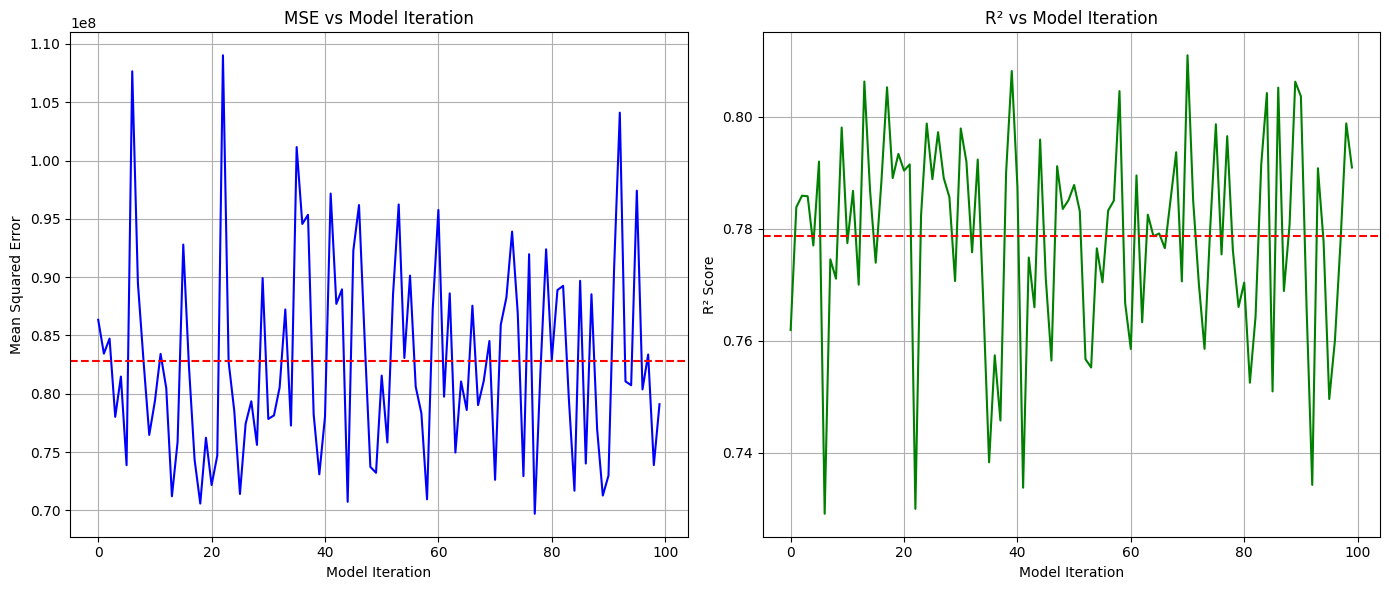

In [235]:
# apply LR model (over loop to generate 100 different models)

X = df_encoded.drop(columns=["price"], axis=1)
numeric_features = ["model", "engine_size", "year", "mileage", "colour", "area"]
y = df_encoded["price"]

model_results = []

for i in tqdm(range(100), desc="Model Iterations:"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train[numeric_features])
    X_test = scaler.fit_transform(X_test[numeric_features])

    # linear regression model
    model = LinearRegression()

    # fit model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {"itr": i, "mse": mse, "r2": r2}

    if r2 < 0:
        break

    model_results.append(results)

df_model_results = pd.DataFrame(model_results)

# plot results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# averages
mean_mse = df_model_results["mse"].mean()
mean_r2 = df_model_results["r2"].mean()
print(f"Mean Squared Error: {mean_mse:.0f}")
print(f"Mean R^2: {mean_r2:.3}")

# MSE
axs[0].plot(df_model_results["itr"], df_model_results["mse"], color="blue")
axs[0].axhline(y=mean_mse, color="red", linestyle="--", label="Average MSE")

axs[0].set_title("MSE vs Model Iteration")
axs[0].set_xlabel("Model Iteration")
axs[0].set_ylabel("Mean Squared Error")
axs[0].grid()

# R^2
axs[1].plot(df_model_results["itr"], df_model_results["r2"], color="green")
axs[1].axhline(y=mean_r2, color="red", linestyle="--", label="Average R²")
axs[1].set_title("R² vs Model Iteration")
axs[1].set_xlabel("Model Iteration")
axs[1].set_ylabel("R² Score")
axs[1].grid()

plt.tight_layout()
plt.show()

#### Model6 - LR (all variables - categorical variables target encoded)

In [236]:
df_ = df.drop(["make"], axis=1)

# define column encoding
target_encode_columns = [
    "model",
    "colour",
    "area",
    "body_type",
    "fuel_type",
    "transmission",
]

# target encode
target_encoder = ce.TargetEncoder(cols=target_encode_columns)
df_encoded = target_encoder.fit_transform(df_, df_["price"])

# dimensions
print(df_encoded.shape)
df_encoded.head()

(9522, 20)


,model,body_type,fuel_type,engine_size,transmission,year,mileage,price,colour,area,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,18746.713333,36917.730867,30126.084090,2.0,29911.183113,2021.0,13434,32000,26772.428191,20058.989169,1,1,1,0,1,1,0,1,1,1
1,33515.118361,25780.601498,30126.084090,1.5,29911.183113,2021.0,6347,32898,26772.428191,35618.577868,1,0,1,0,0,0,1,0,0,0
2,33515.118361,25780.601498,30126.084090,1.5,12759.030033,2021.0,10,35510,26772.428191,18750.370787,1,1,1,0,1,0,1,1,0,0
3,26799.032368,28897.715441,48817.767318,2.0,29911.183113,2022.0,6500,37999,30217.268641,25452.146019,1,1,1,0,1,1,1,0,0,0
4,16378.357724,19558.041931,17878.120375,2.0,12759.030033,2012.0,136952,4890,27543.439768,30553.387754,0,0,0,0,0,0,0,0,0,0


Model Iterations:: 100%|██████████| 100/100 [00:00<00:00, 152.79it/s]


Mean Squared Error: 78247768
Mean R^2: 0.791


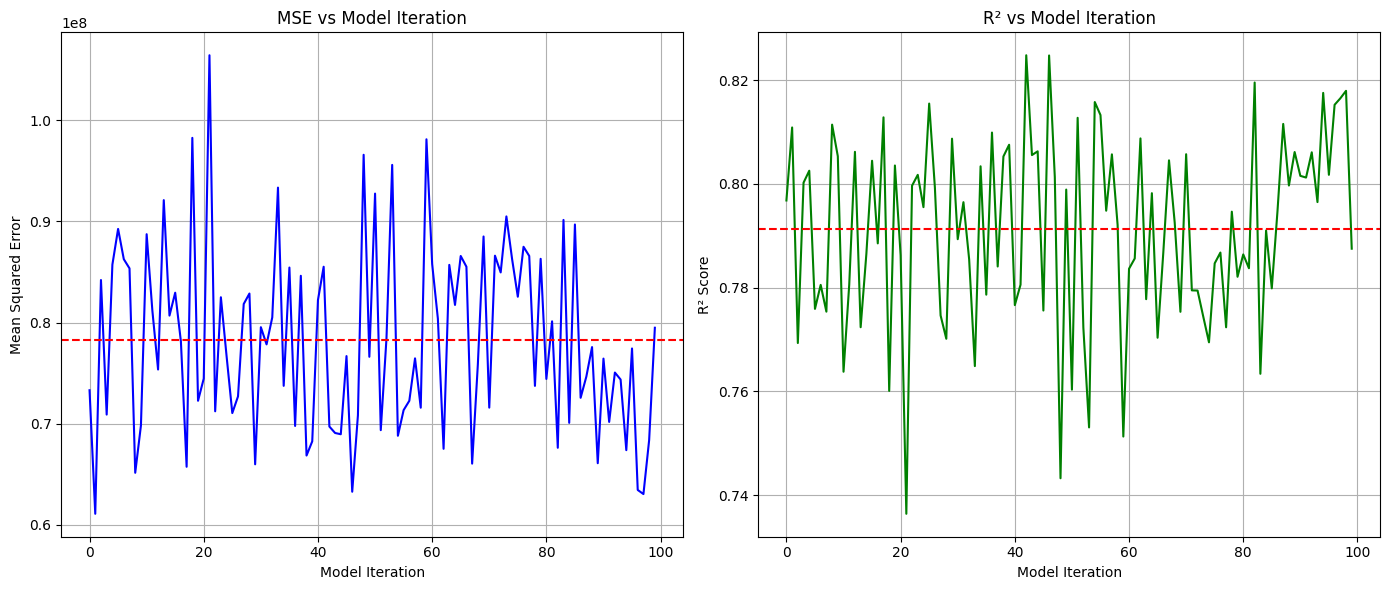

In [237]:
# apply LR model (over loop to generate 100 different models)

X = df_encoded.drop(columns=["price"], axis=1)
numeric_features = [
    "model",
    "engine_size",
    "year",
    "mileage",
    "colour",
    "area",
    "body_type",
    "fuel_type",
    "transmission",
]
y = df_encoded["price"]

model_results = []

for i in tqdm(range(100), desc="Model Iterations:"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train[numeric_features])
    X_test = scaler.fit_transform(X_test[numeric_features])

    # linear regression model
    model = LinearRegression()

    # fit model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {"itr": i, "mse": mse, "r2": r2}

    if r2 < 0:
        break

    model_results.append(results)

df_model_results = pd.DataFrame(model_results)

# plot results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# averages
mean_mse = df_model_results["mse"].mean()
mean_r2 = df_model_results["r2"].mean()
print(f"Mean Squared Error: {mean_mse:.0f}")
print(f"Mean R^2: {mean_r2:.3}")

# MSE
axs[0].plot(df_model_results["itr"], df_model_results["mse"], color="blue")
axs[0].axhline(y=mean_mse, color="red", linestyle="--", label="Average MSE")

axs[0].set_title("MSE vs Model Iteration")
axs[0].set_xlabel("Model Iteration")
axs[0].set_ylabel("Mean Squared Error")
axs[0].grid()

# R^2
axs[1].plot(df_model_results["itr"], df_model_results["r2"], color="green")
axs[1].axhline(y=mean_r2, color="red", linestyle="--", label="Average R²")
axs[1].set_title("R² vs Model Iteration")
axs[1].set_xlabel("Model Iteration")
axs[1].set_ylabel("R² Score")
axs[1].grid()

plt.tight_layout()
plt.show()

### Random Forest (RF)

#### Model5 - RF (all variables - categorical variables mixed encoded)

Model Iterations:: 100%|██████████| 100/100 [03:01<00:00,  1.81s/it]


Mean Squared Error: 30050445
Mean R^2: 0.92


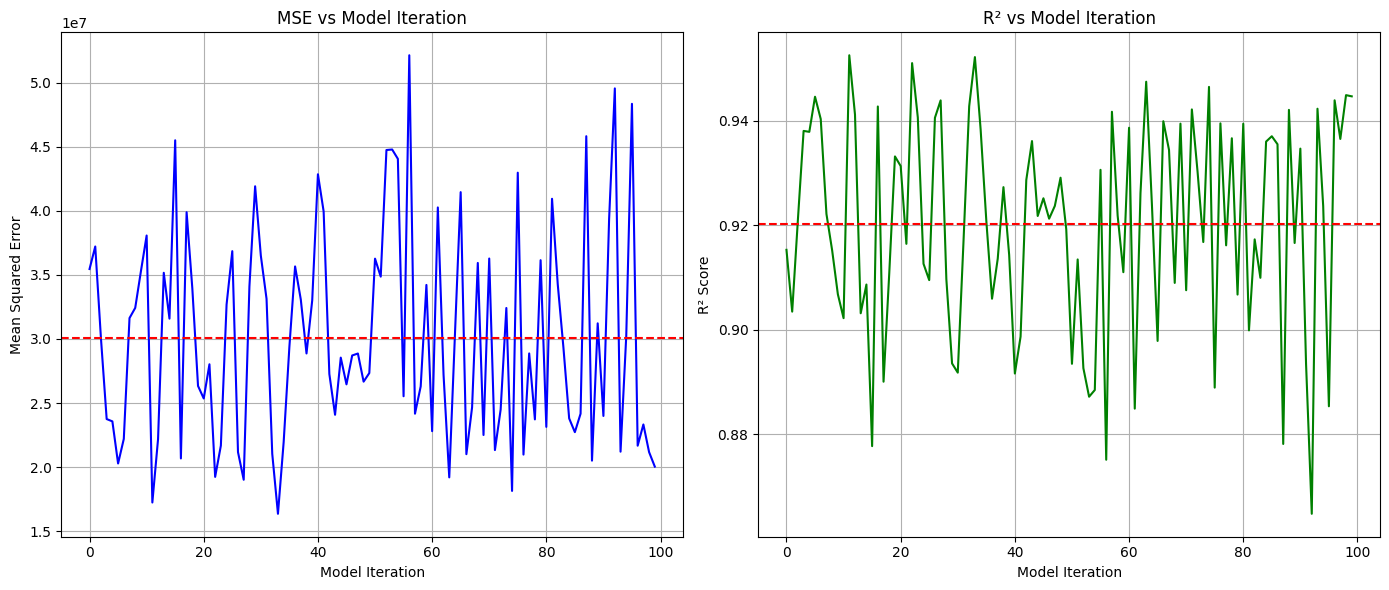

In [238]:
# apply LR model (over loop to generate 100 different models)

X = df_encoded.drop(columns=["price"], axis=1)
numeric_features = ["model", "engine_size", "year", "mileage", "colour", "area"]
y = df_encoded["price"]

model_results = []

for i in tqdm(range(100), desc="Model Iterations:"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train[numeric_features])
    X_test = scaler.fit_transform(X_test[numeric_features])

    # linear regression model
    model = RandomForestRegressor()

    # fit model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {"itr": i, "mse": mse, "r2": r2}

    if r2 < 0:
        break

    model_results.append(results)

df_model_results = pd.DataFrame(model_results)

# plot results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# averages
mean_mse = df_model_results["mse"].mean()
mean_r2 = df_model_results["r2"].mean()
print(f"Mean Squared Error: {mean_mse:.0f}")
print(f"Mean R^2: {mean_r2:.3}")

# MSE
axs[0].plot(df_model_results["itr"], df_model_results["mse"], color="blue")
axs[0].axhline(y=mean_mse, color="red", linestyle="--", label="Average MSE")

axs[0].set_title("MSE vs Model Iteration")
axs[0].set_xlabel("Model Iteration")
axs[0].set_ylabel("Mean Squared Error")
axs[0].grid()

# R^2
axs[1].plot(df_model_results["itr"], df_model_results["r2"], color="green")
axs[1].axhline(y=mean_r2, color="red", linestyle="--", label="Average R²")
axs[1].set_title("R² vs Model Iteration")
axs[1].set_xlabel("Model Iteration")
axs[1].set_ylabel("R² Score")
axs[1].grid()

plt.tight_layout()
plt.show()

#### Model6 - RF (all variables - categorical variables target encoded)

tqdm() Progress Bar: 100%|██████████| 100/100 [04:31<00:00,  2.72s/it]


Mean Squared Error: 21850333
Mean R^2: 0.943


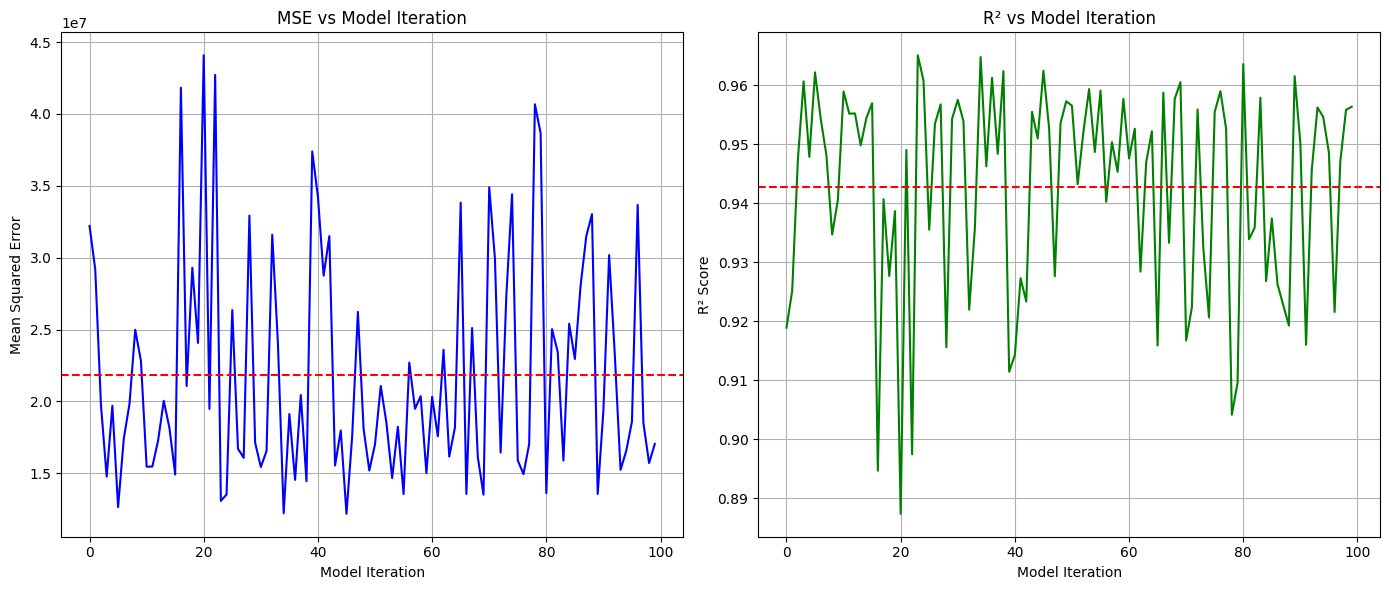

In [258]:
# apply RF model (over loop to generate 100 different models)

X = df_encoded.drop(columns=["price"], axis=1)
numeric_features = [
    "model",
    "engine_size",
    "year",
    "mileage",
    "colour",
    "area",
    "body_type",
    "fuel_type",
    "transmission",
]
y = df_encoded["price"]

model_results = []

for i in tqdm(range(100), desc="tqdm() Progress Bar"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # scaling not required in RF
    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train[numeric_features])
    # X_test = scaler.fit_transform(X_test[numeric_features])

    # linear regression model
    model = RandomForestRegressor()

    # fit model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {"itr": i, "mse": mse, "r2": r2}

    if r2 < 0:
        break

    model_results.append(results)

df_model_results = pd.DataFrame(model_results)

# plot results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# averages
mean_mse = df_model_results["mse"].mean()
mean_r2 = df_model_results["r2"].mean()
print(f"Mean Squared Error: {mean_mse:.0f}")
print(f"Mean R^2: {mean_r2:.3}")

# MSE
axs[0].plot(df_model_results["itr"], df_model_results["mse"], color="blue")
axs[0].axhline(y=mean_mse, color="red", linestyle="--", label="Average MSE")

axs[0].set_title("MSE vs Model Iteration")
axs[0].set_xlabel("Model Iteration")
axs[0].set_ylabel("Mean Squared Error")
axs[0].grid()

# R^2
axs[1].plot(df_model_results["itr"], df_model_results["r2"], color="green")
axs[1].axhline(y=mean_r2, color="red", linestyle="--", label="Average R²")
axs[1].set_title("R² vs Model Iteration")
axs[1].set_xlabel("Model Iteration")
axs[1].set_ylabel("R² Score")
axs[1].grid()

plt.tight_layout()
plt.show()

##### Feature Importance

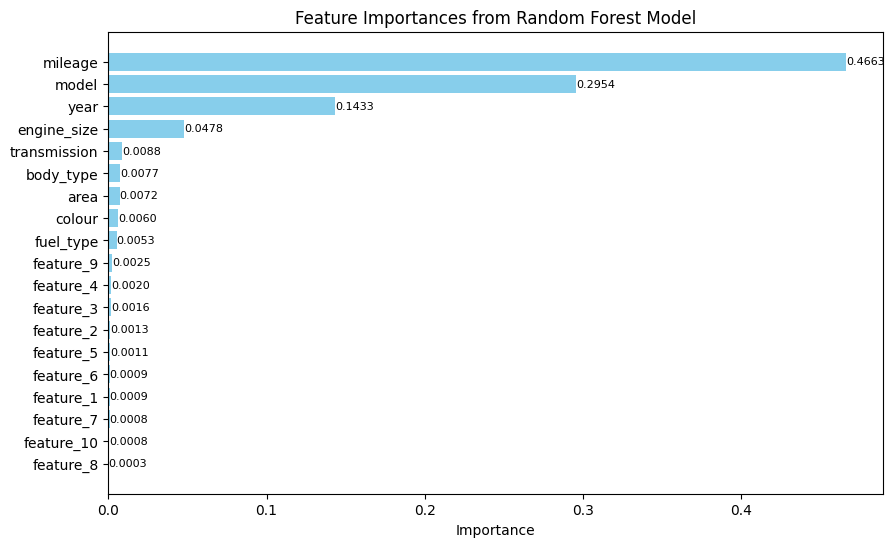

In [264]:
# Extract feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame(
    {
        "Feature": X.columns,  # Replace X with your features DataFrame
        "Importance": feature_importances,
    }
)

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")

# Adding value annotations to the end of each bar
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.4f}",
        va="center",
        ha="left",
        size=8,
    )

plt.xlabel("Importance")
plt.title("Feature Importances from Random Forest Model")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

- perhaps features with low importance (< 0.01) should be dropped before hyperparameter tuning

##### Hyperparameter Tune 

- tune the models hyperparameters and cross-validation to determine whether an improved model configuration can be found
    - important parameters:
        - n_estimators: number of trees in the forest - increasing the number of trees can improve performance, but it also increases computational cost and training time.
        - max_features: number of features to consider when looking for the best split - lowering this can reduce overfitting, but too low a value may lead to underfitting
        - maximum depth of each tree - limiting the depth of trees can prevent overfitting, a deeper tree can model more complex relationships but may lead to overfitting
        - min_samples_split: minimum number of samples required to split an internal node - increasing this value can help prevent overfitting by requiring more samples to create a split
        - min_samples_leaf: minimum number of samples required to be at a leaf node - can help prevent overfitting by ensuring that leaf nodes have a minimum number of samples
        - bootstrap: whether bootstrap samples are used when building trees

In [240]:
from pprint import pprint

# current model parameters - default values
print("Parameters currently in use:\n")
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [245]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = [None, "sqrt", "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': [None, 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [265]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
model = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(
    estimator=model,
    param_distributions=random_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
)

# generate train-test sets, only use important features from previous analysis
X = df_encoded[["mileage", "model", "year", "engine_size"]]
y = df_encoded["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   3.1s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   3.0s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.6s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=4

/Users/nb1777/Git/wrt_at/vehicle_price_prediction/.venv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   5.8s
[CV] END bootstrap=True, max_depth=90, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   9.1s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   6.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   9.6s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   9.5s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   9.7s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   6.0s
[CV] END bootstrap=True, max_depth=70, max_fe

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [266]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 40,
 'bootstrap': True}

tqdm() Progress Bar: 100%|██████████| 100/100 [14:40<00:00,  8.80s/it]


Mean Squared Error: 23371174
Mean R^2: 0.938


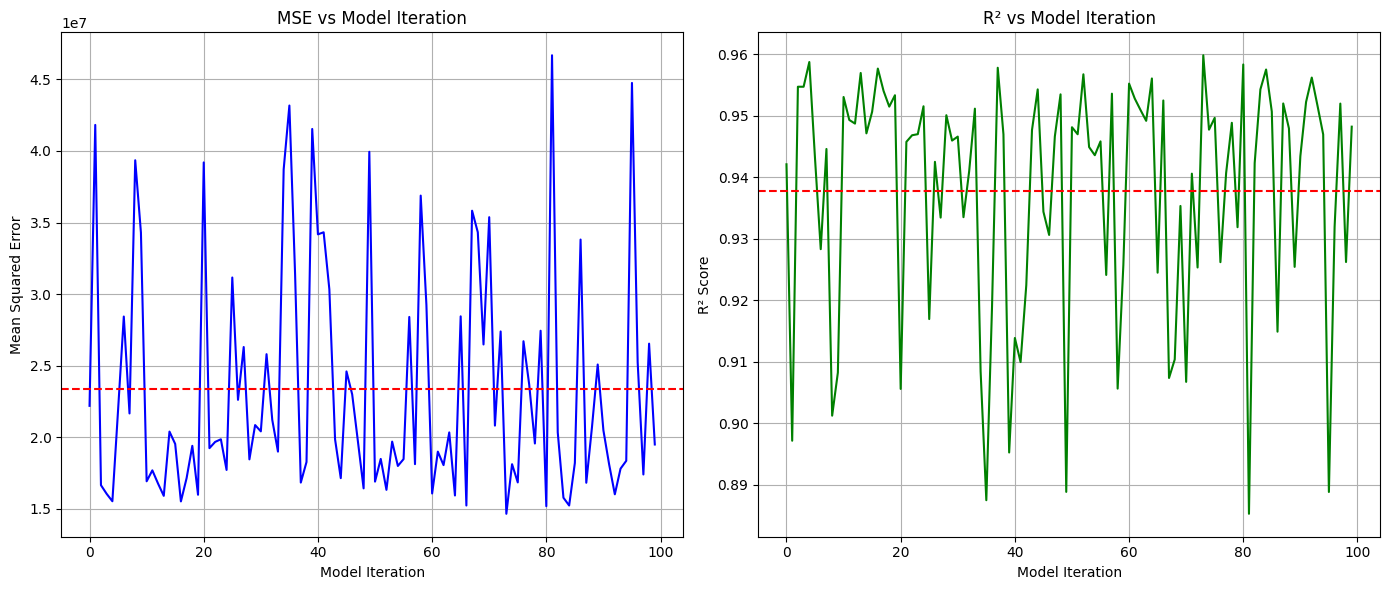

In [267]:
# apply RF model (over loop to generate 100 different models)

X = df_encoded[["mileage", "model", "year", "engine_size"]]
y = df_encoded["price"]

model_results = []

for i in tqdm(range(100), desc="tqdm() Progress Bar"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # scaling not required in RF

    # linear regression model
    model = rf_random.best_estimator_

    # fit model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {"itr": i, "mse": mse, "r2": r2}

    if r2 < 0:
        break

    model_results.append(results)

df_model_results = pd.DataFrame(model_results)

# plot results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# averages
mean_mse = df_model_results["mse"].mean()
mean_r2 = df_model_results["r2"].mean()
print(f"Mean Squared Error: {mean_mse:.0f}")
print(f"Mean R^2: {mean_r2:.3}")

# MSE
axs[0].plot(df_model_results["itr"], df_model_results["mse"], color="blue")
axs[0].axhline(y=mean_mse, color="red", linestyle="--", label="Average MSE")

axs[0].set_title("MSE vs Model Iteration")
axs[0].set_xlabel("Model Iteration")
axs[0].set_ylabel("Mean Squared Error")
axs[0].grid()

# R^2
axs[1].plot(df_model_results["itr"], df_model_results["r2"], color="green")
axs[1].axhline(y=mean_r2, color="red", linestyle="--", label="Average R²")
axs[1].set_title("R² vs Model Iteration")
axs[1].set_xlabel("Model Iteration")
axs[1].set_ylabel("R² Score")
axs[1].grid()

plt.tight_layout()
plt.show()

- tuning of hyperparamters has minimal impact on the model performance (on average, if anything slightly worse) - the default random forest is sufficent

## Gradient Boosting Regression (GB)

### Model6 - GB (all variables, categorical variables target encoded)

tqdm() Progress Bar: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Mean Squared Error: 39949005
Mean R^2: 0.893


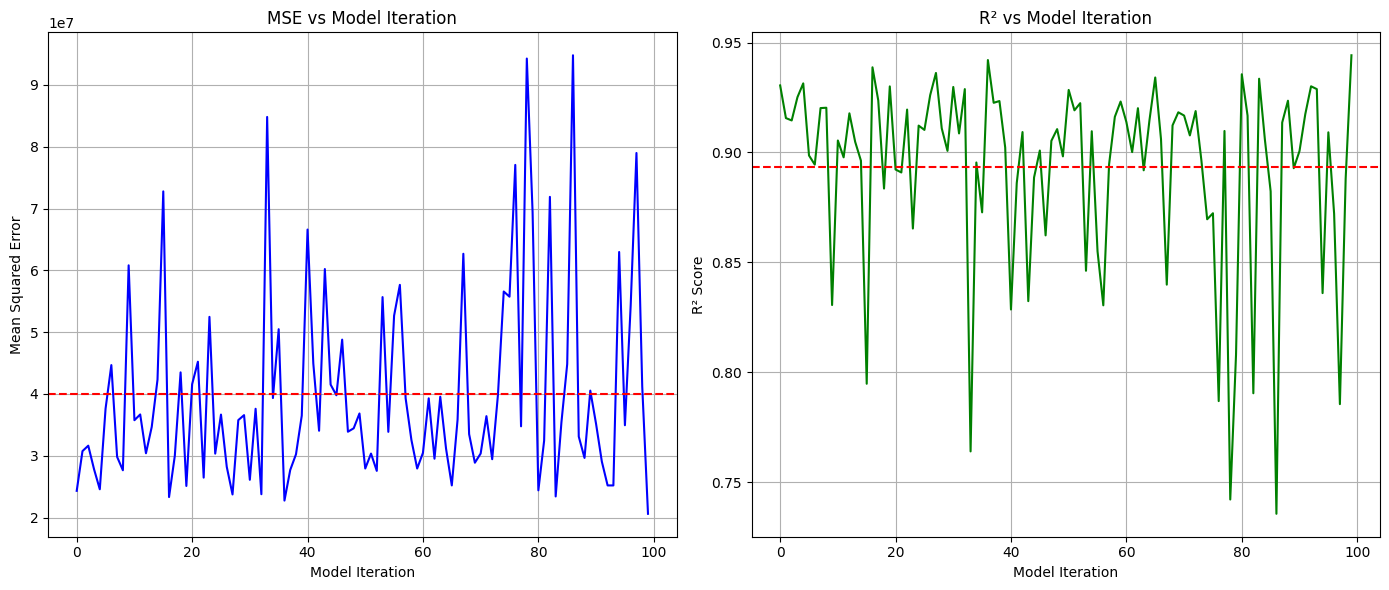

In [252]:
# apply RF model (over loop to generate 100 different models)

X = df_encoded.drop(columns=["price"], axis=1)
numeric_features = [
    "model",
    "engine_size",
    "year",
    "mileage",
    "colour",
    "area",
    "body_type",
    "fuel_type",
    "transmission",
]
y = df_encoded["price"]

model_results = []

for i in tqdm(range(100), desc="tqdm() Progress Bar"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train[numeric_features])
    X_test = scaler.fit_transform(X_test[numeric_features])

    # linear regression model
    model = GradientBoostingRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
    )

    # fit model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {"itr": i, "mse": mse, "r2": r2}

    if r2 < 0:
        break

    model_results.append(results)

df_model_results = pd.DataFrame(model_results)

# plot results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# averages
mean_mse = df_model_results["mse"].mean()
mean_r2 = df_model_results["r2"].mean()
print(f"Mean Squared Error: {mean_mse:.0f}")
print(f"Mean R^2: {mean_r2:.3}")

# MSE
axs[0].plot(df_model_results["itr"], df_model_results["mse"], color="blue")
axs[0].axhline(y=mean_mse, color="red", linestyle="--", label="Average MSE")

axs[0].set_title("MSE vs Model Iteration")
axs[0].set_xlabel("Model Iteration")
axs[0].set_ylabel("Mean Squared Error")
axs[0].grid()

# R^2
axs[1].plot(df_model_results["itr"], df_model_results["r2"], color="green")
axs[1].axhline(y=mean_r2, color="red", linestyle="--", label="Average R²")
axs[1].set_title("R² vs Model Iteration")
axs[1].set_xlabel("Model Iteration")
axs[1].set_ylabel("R² Score")
axs[1].grid()

plt.tight_layout()
plt.show()



# TODO - notes only
- compare model performance across all models - store model performance (mean, stdev) in dataframe
- check, am I collecting the correct metrics?
- compare residuals against price_position - what is the correlation, what does this tell us?

In [268]:
# compare models
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Assuming you have a dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
}

results = []

for name, model in models.items():
    # Cross-validation MSE
    mse_scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
    mean_mse = -mse_scores.mean()
    rmse = mean_mse**0.5

    # Fit the model and calculate R²
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "MSE": mean_mse, "RMSE": rmse, "R²": r2})

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

               Model           MSE         RMSE        R²
0  Linear Regression  8.754284e+07  9356.432862  0.790473
1      Random Forest  2.615137e+07  5113.841347  0.942725
2  Gradient Boosting  2.786985e+07  5279.190506  0.941559


In [ ]:
# residuals
# Assuming y_test is your actual prices and y_pred are the predicted prices
residuals = y_test - y_pred

# Add residuals and price position to a DataFrame for comparison
comparison_df = pd.DataFrame(
    {
        "Actual Price": y_test,
        "Predicted Price": y_pred,
        "Residuals": residuals,
        "Price Position": df_test[
            "price_position"
        ],  # Replace with the actual DataFrame containing price_position
    }
)

import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparison_df, x="Price Position", y="Residuals")
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Price Position")
plt.xlabel("Price Position")
plt.ylabel("Residuals")
plt.grid()
plt.show()

correlation = comparison_df["Residuals"].corr(comparison_df["Price Position"])
print(f"Correlation between residuals and price position: {correlation:.2f}")